## 导入相关的包

In [1]:
import os
import re

import jieba as jb
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

## 读取数据集内容

In [2]:
train_y = []
datas = []
for i in range(7):
    files = os.listdir("./data/{}".format(i + 1))
    for file in files:
        with open("./data/{}/".format(i + 1) + file, 'r', encoding='utf-8') as f:
            train_y.append(i + 1)
            datas.append(f.read())

## 转换为dataframe

In [3]:
df_ = np.mat([train_y, datas])
df = pd.DataFrame(df_.T)
df.rename(columns={0: 'cat', 1: 'review'}, inplace=True)  # 注意这里0和1都不是字符
print(df)

d = {'cat': df['cat'].value_counts().index, 'count': df['cat'].value_counts()}
df_cat = pd.DataFrame(data=d).reset_index(drop=True)
print(df_cat)

     cat                                             review
0      1  2014年以来全国因洪涝灾害死亡377人 失踪94人\n 2014年09月02日 21:30...
1      1  5月份全国自然灾害以洪涝、地质和风雹灾害为主\n 2016年06月13日 11:08\n中国...
2      1  6月28日以来南方暴雨洪涝灾害致150万余人受灾\n2011年07月02日 16:07　\n...
3      1  7月1日以来暴雨洪涝风雹灾害致70人死亡或失踪\n2011年07月08日 20:08　\n中...
4      1  7月以来16省份遇暴雨洪涝灾害 200余万人受灾\n2011年07月05日 16:06　\n...
...   ..                                                ...
6398   7  “鲇鱼"漫游 吃掉漳州27亿\n2010-10-25 15:40\n晋江新闻网\n据漳州市防...
6399   7  “鲇鱼"肆虐福建致6人死亡\n2016-10-01 01:57\n闽南网\n­  中新网福州...
6400   7  “鲇鱼"致泉州26.61万人受灾 直接经济损失23.42亿元\n2016-09-29 10:...
6401   7  “鲇鱼"致福州76万户停电 目前已恢复13.8万户\n2016-09-28 10:32:45...
6402   7  “鲇鱼"致福建60多万人受灾 未发生人员伤亡\n2010-10-24 20:17:57\n中...

[6403 rows x 2 columns]
  cat  count
0   3   1012
1   6    952
2   4    939
3   1    936
4   5    863
5   2    858
6   7    843


## 定义删除除字母,数字，汉字以外的所有符号的函数

In [4]:
def remove_punctuation(line):
    if line.strip() == '':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('', line)
    return line


def stopwordslist(filepath):
    _stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return _stopwords

## 预处理文字

In [5]:
# 加载停用词
stopwords = stopwordslist("./data/chineseStopWords.txt")

# 删除除字母,数字，汉字以外的所有符号
df['clean_review'] = df['review'].apply(remove_punctuation)
print(df.sample(10))

# 分词，并过滤停用词
df['cut_review'] = df['clean_review'].apply(lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stopwords]))
print(df.head())

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ZHANGY~1\AppData\Local\Temp\jieba.cache


     cat                                             review  \
1163   2  包头固阳冰雹天气致经济损失近700万元\n12-07-10 10:38\n来源： 包头晚报\...   
3915   5  内蒙古局地近期遭严重旱灾 102万人需生活救助\n 2015年09月27日 10:34\n中...   
5697   7  台风“利奇马”有所减弱 将于11日在山东再次登陆\n2019-08-10 14:21\n中国...   
5772   7  台风“尼伯特"已导致泉州直接经济损失2.31亿\n2016-07-11 08:51\n海峡网...   
4912   6  和林县4人遭雷击 1死2伤\n11-08-16 11:13\n内蒙古新闻网  \n8月9日7...   
3425   4  河北保定7县（区）26乡镇遭受风雹袭击3万余人受灾\n2020-06-2717:46:25。...   
791    1  贵州强降水引发洪涝泥石流灾害 22万人受灾\n 2012年06月11日 13:43\n中国新...   
3293   4  新疆喀什部分地区遭受大风袭击\n2019-11-1909:35:42\n来源：国家减灾中心\...   
3805   5  云南侨乡河口上万亩林木受旱 经济损失严重\n 2012年03月23日 18:07\n中国新闻...   
1297   2  广西河池市遭受风雹灾害致1.5万人受灾(图)\n2012年04月10日 09:50\n来源：...   

                                           clean_review  
1163  包头固阳冰雹天气致经济损失近700万元1207101038来源包头晚报7月3日及4日包头市固...  
3915  内蒙古局地近期遭严重旱灾102万人需生活救助2015年09月27日1034中国新闻网中新网9...  
5697  台风利奇马有所减弱将于11日在山东再次登陆201908101421中国新闻网来源新华社新华社...  
5772  台风尼伯特已导致泉州直接经济损失231亿201607110851海峡网今年第1号台风尼伯特对...  
4912  和林县4人遭雷击1死

Loading model cost 1.034 seconds.
Prefix dict has been built successfully.


  cat                                             review  \
0   1  2014年以来全国因洪涝灾害死亡377人 失踪94人\n 2014年09月02日 21:30...   
1   1  5月份全国自然灾害以洪涝、地质和风雹灾害为主\n 2016年06月13日 11:08\n中国...   
2   1  6月28日以来南方暴雨洪涝灾害致150万余人受灾\n2011年07月02日 16:07　\n...   
3   1  7月1日以来暴雨洪涝风雹灾害致70人死亡或失踪\n2011年07月08日 20:08　\n中...   
4   1  7月以来16省份遇暴雨洪涝灾害 200余万人受灾\n2011年07月05日 16:06　\n...   

                                        clean_review  \
0  2014年以来全国因洪涝灾害死亡377人失踪94人2014年09月02日2130中国新闻网记...   
1  5月份全国自然灾害以洪涝地质和风雹灾害为主2016年06月13日1108中国新闻网中新网6月...   
2  6月28日以来南方暴雨洪涝灾害致150万余人受灾2011年07月02日1607中国新闻网中新...   
3  7月1日以来暴雨洪涝风雹灾害致70人死亡或失踪2011年07月08日2008中国新闻网中新网...   
4  7月以来16省份遇暴雨洪涝灾害200余万人受灾2011年07月05日1606中国新闻网中新网...   

                                          cut_review  
0  2014 年 全国 洪涝灾害 死亡 377 失踪 94 2014 年 09 月 02 日 2...  
1  月份 全国 自然灾害 洪涝 地质 风雹 灾害 为主 2016 年 06 月 13 日 110...  
2  月 28 日 南方 暴雨 洪涝灾害 150 万余 受灾 2011 年 07 月 02 日 1...  
3  月 日 暴雨 洪涝 风雹 灾害 70 死亡 失踪 2011 年 07 月 08 日 2008...  
4  月 16 省份 遇 暴雨 洪涝灾害 200 余万

## 分割处理

In [6]:
# 设置最频繁使用的50000个词
MAX_NB_WORDS = 50000
# 每条cut_review最大的长度
MAX_SEQUENCE_LENGTH = 250
# 设置Embedding层的维度
EMBEDDING_DIM = 100

tokenizer = keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
                                               lower=True)
tokenizer.fit_on_texts(df['cut_review'].values)
word_index = tokenizer.word_index
print('共有 %s 个不相同的词语.' % len(word_index))

共有 58907 个不相同的词语.


## 配置为训练集和测试集

In [46]:
X = tokenizer.texts_to_sequences(df['cut_review'].values)
# 填充X,让X的各个列的长度统一
X = keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# 多类标签的onehot展开
Y = pd.get_dummies(df['cat']).values

print(X.shape)
print(Y.shape)

# 拆分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(6403, 250)
(6403, 7)
(5762, 250) (5762, 7)
(641, 250) (641, 7)


## 定义模型

In [8]:
model = keras.Sequential()
model.add(keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(keras.layers.SpatialDropout1D(0.2))
model.add(keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 7)                 707       
                                                                 
Total params: 5,081,107
Trainable params: 5,081,107
Non-trainable params: 0
_________________________________________________________________
None


## 训练模型

In [9]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
82/82 [==============================] - 46s 536ms/step - loss: 1.6109 - accuracy: 0.3743 - val_loss: 1.4204 - val_accuracy: 0.4402
Epoch 2/5
82/82 [==============================] - 49s 600ms/step - loss: 1.1045 - accuracy: 0.5782 - val_loss: 0.9219 - val_accuracy: 0.7002
Epoch 3/5
82/82 [==============================] - 50s 618ms/step - loss: 0.6901 - accuracy: 0.7724 - val_loss: 0.6664 - val_accuracy: 0.7799
Epoch 4/5
82/82 [==============================] - 54s 662ms/step - loss: 0.3964 - accuracy: 0.8852 - val_loss: 0.6058 - val_accuracy: 0.8475
Epoch 5/5
82/82 [==============================] - 54s 662ms/step - loss: 0.2962 - accuracy: 0.9178 - val_loss: 0.7472 - val_accuracy: 0.8128


## 保存模型

In [15]:
model.save("./lstm.h5")

## 绘制损失曲线

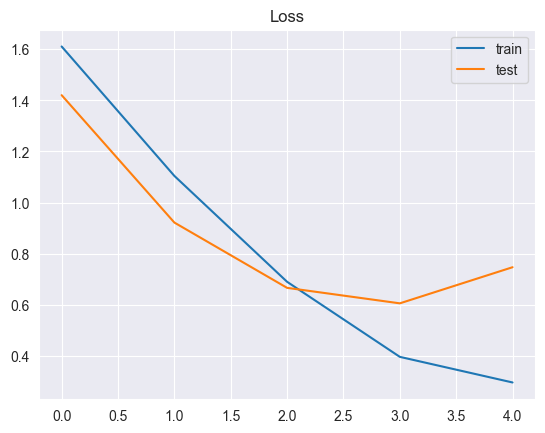

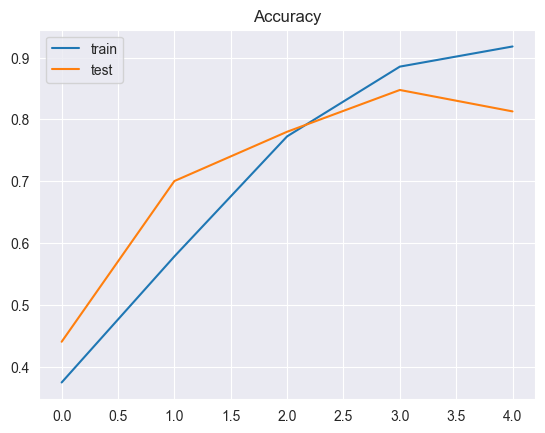

In [13]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## 通过测试集生成混淆矩阵

21/21 [==============================] - 1s 32ms/step
[3 2 4 1 5 6 2 0 2 2 6 1 5 0 6 0 4 1 6 5 0 3 4 3 6 1 3 6 5 4 4 2 0 3 5 4 5
 4 2 0 0 1 6 0 3 0 4 2 4 1 0 5 3 6 2 4 5 6 0 0 5 0 0 6 0 3 0 5 2 2 2 3 4 4
 3 1 5 4 5 1 6 5 4 4 5 5 1 5 5 4 1 3 0 3 5 5 6 3 6 3 4 6 0 6 1 6 1 1 2 0 2
 4 0 0 0 6 6 4 1 1 1 2 5 1 1 5 6 0 3 1 5 2 2 2 0 1 0 4 4 2 4 6 1 2 3 4 4 0
 5 1 3 6 4 6 5 2 0 2 4 4 3 0 3 6 6 2 1 2 1 1 0 3 2 1 6 4 5 6 0 5 3 0 5 0 2
 1 1 5 1 1 3 4 1 5 3 5 2 3 4 5 1 0 0 5 5 3 3 3 1 4 5 0 2 0 3 2 0 2 6 5 3 5
 1 3 2 3 2 2 2 5 5 6 4 2 6 0 3 2 0 1 0 3 5 6 1 3 2 4 4 2 2 5 2 6 3 0 5 1 2
 4 5 5 2 4 3 0 1 0 1 1 5 0 2 0 2 2 4 6 4 6 1 2 2 1 1 2 1 5 0 5 0 0 5 5 1 5
 5 4 1 4 4 2 5 2 2 4 6 5 0 5 2 3 1 6 5 2 0 3 6 2 2 0 6 1 0 0 2 2 6 2 4 4 1
 0 1 3 2 6 0 3 1 0 2 3 5 2 2 2 0 0 1 4 2 3 3 5 6 0 3 4 4 4 0 2 2 1 2 2 0 1
 2 6 3 1 3 1 3 1 0 5 4 3 5 3 0 4 0 3 3 0 2 6 0 4 3 3 4 6 6 1 1 1 3 1 1 1 6
 1 2 0 1 3 4 2 5 1 5 5 0 3 3 5 0 5 6 0 6 2 2 6 1 3 4 6 6 3 1 5 0 1 6 6 4 4
 0 0 4 4 0 6 5 0 1 2 6 5 3 5 1 0 4 2 1 4 6 1 6

Text(0.5, 58.7222222222222, 'pred')

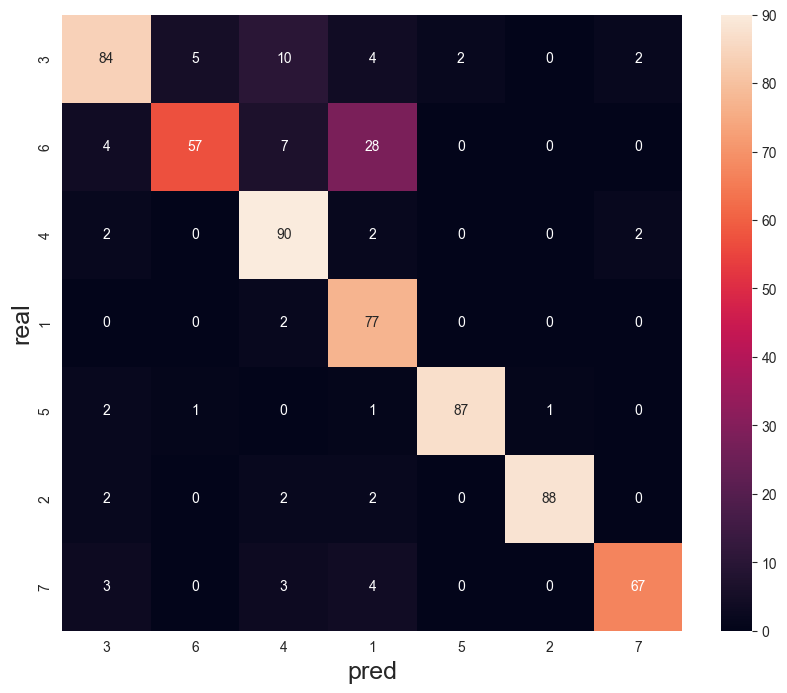

In [47]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
Y_test = Y_test.argmax(axis=1)
print(Y_test, y_pred)

# 生成混淆矩阵
conf_mat = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df_cat.cat.values, yticklabels=df_cat.cat.values)
plt.ylabel('real', fontsize=18)
plt.xlabel('pred', fontsize=18)

In [49]:
print('accuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred, target_names=df_cat['cat'].values))

accuracy 0.858034321372855
              precision    recall  f1-score   support

           3       0.87      0.79      0.82       107
           6       0.90      0.59      0.72        96
           4       0.79      0.94      0.86        96
           1       0.65      0.97      0.78        79
           5       0.98      0.95      0.96        92
           2       0.99      0.94      0.96        94
           7       0.94      0.87      0.91        77

    accuracy                           0.86       641
   macro avg       0.87      0.86      0.86       641
weighted avg       0.88      0.86      0.86       641

